# Project Title (Replace this with your project title)

* Write out the problem statement
* Give a short description of the project


In [1]:
#import python libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data? 
    * how many rows and columns? - **4522 rows and 17 columns**
    * does it have missing values? - **No missing values**
    * any other significant details 

In [2]:
pwd()

'/Users/boluwatifeoduyemi/Documents/Data Science/10Alytics Full Stack Training/Python Class/Assignments/Group project'

In [3]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters

data = pd.read_csv('bank.csv',sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [4]:
data.shape

(4522, 17)

In [5]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [6]:
#delete the first row 
data.drop(0,inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [7]:
data.shape

(4521, 17)

In [8]:
#inspect the data for missing values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
sns.set()

<AxesSubplot:title={'center':'Missing Data'}>

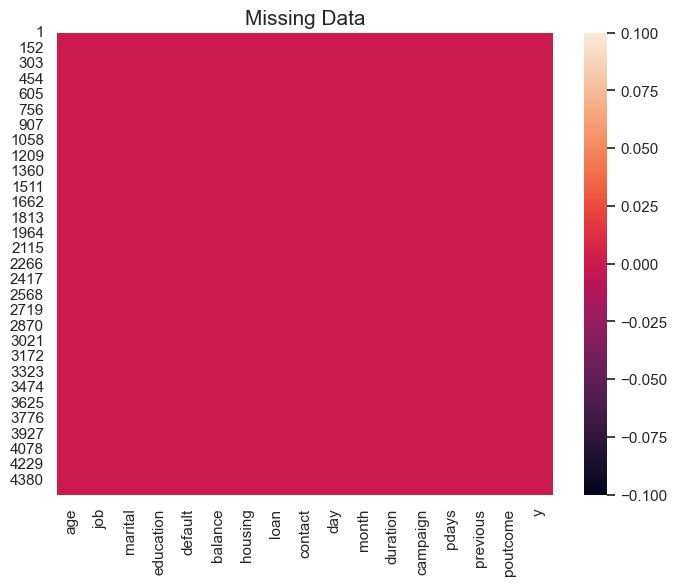

In [10]:
# Visualize the missing data on a heat map

plt.figure(figsize=(8,6))
plt.title('Missing Data', fontsize=15)
sns.heatmap(data.isnull())

**The heat map plotted above, shows that there are no missing data**

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


#### Note: There are no missing values

However, we have to change some of the data types to match the problem set

In [12]:
data['age'] = pd.to_numeric(data['age'])
data['balance'] = pd.to_numeric(data['balance'])
data['day'] = pd.to_numeric(data['day'])
data['duration'] = pd.to_numeric(data['duration'])
data['campaign'] = pd.to_numeric(data['campaign'])
data['pdays'] = pd.to_numeric(data['pdays'])
data['previous'] = pd.to_numeric(data['previous'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [13]:
# Missing values have been called 'Unknown', let's count them
data[data=='unknown'].count()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [14]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Replacing unknown values

We need to replace the unknown values, for a more accurate analysis of our data. 

In order to achieve this, we need to evaluate the median and mode of the columns with unknown values i.e. jobs, education, contact and poutcome

Below are commands to evaluate these

In [15]:
import statistics as st

In [16]:
# modal value of job column

st.mode(data['job'])

'management'

In [17]:
# median value of job column

st.median(data['job'])

'management'

In [18]:
# modal value of education column

st.mode(data['education'])

'secondary'

In [19]:
# median value of education column

st.median(data['education'])

'secondary'

In [20]:
# What are the unique values in the contact column

data['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [21]:
# modal value of contact column

st.mode(data['contact'])

'cellular'

In [22]:
# median value of contact column

st.median(data['contact'])

'cellular'

In [23]:
# Unique values of the poutcome column

data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [24]:
# modal value of poutcome column

st.mode(data['poutcome'])

'unknown'

In [25]:
# median value of poutcome column

st.median(data['poutcome'])

'unknown'

In [26]:
# Let's see how many times each of the values in the poutcome column occurs

data.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

**Note that the poutcome column has a median and modal value of 'unknown'. This is because there are a large number of unknowns in this column, hence we will not be replacing this column**

The idea is to get the best possible fit for our data

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

### Bar Chart Showing Marital Status of the Clients

In [27]:
# Count the unique values in the marital column

marital_count = data.groupby('marital')['marital'].count()
marital_count.sort_values(ascending=False)

marital
married     2797
single      1196
divorced     528
Name: marital, dtype: int64

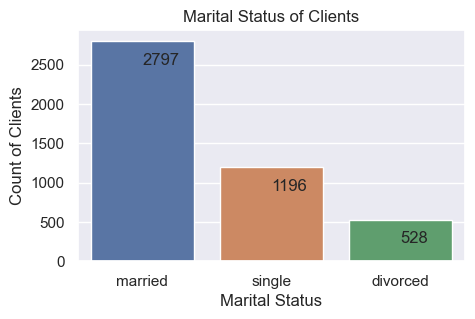

In [28]:
plt.figure(figsize=(5,3))
plt.title('Marital Status of Clients')
sns.countplot(x='marital', data=data,)
for i, value in enumerate(marital_count.sort_values(ascending=False).values):
    plt.text(i, value-300, str(value), fontsize=12)

plt.xlabel('Marital Status')
plt.ylabel('Count of Clients')
plt.show()

### Bar Chart Showing Occupation of the Clients

In [29]:
# Count the unique values in the job column

job_count = data['job'].count()
job_count

4521

In [30]:
# Create a new column called 'Employment_status' and replace the job values with employed

def job_status(x):
    if x == 'unemployed':
        return 'Unemployed'
    else:
        return 'Employed'
data['Employment_status'] = data['job'].apply(job_status)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Employment_status
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Unemployed
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Employed
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Employed
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Employed
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,Employed
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,Employed
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,Employed
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,Employed


In [31]:
# Count the values in the job column

unemployed_count = data['Employment_status'].value_counts()['Unemployed']
unemployed_count

128

In [32]:
employed_count = data['Employment_status'].value_counts()['Employed']
employed_count

4393

In [33]:
# Count the unique values in the Employment_status column

Emp_count = data.groupby('Employment_status')['Employment_status'].count()
Emp_count

Employment_status
Employed      4393
Unemployed     128
Name: Employment_status, dtype: int64

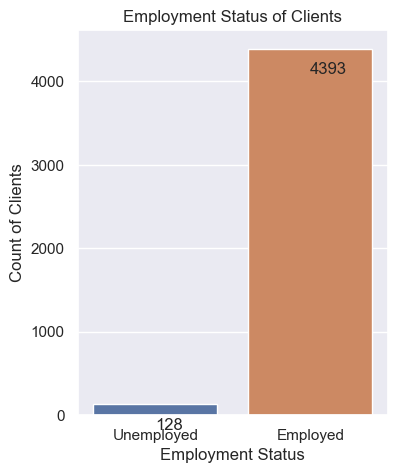

In [34]:
plt.figure(figsize=(4,5))
plt.title('Employment Status of Clients')
sns.countplot(x='Employment_status', data=data,)
for i, value in enumerate(Emp_count.sort_values(ascending=True).values):
    plt.text(i, value-300, str(value), fontsize=12)

plt.xlabel('Employment Status')
plt.ylabel('Count of Clients')
plt.show()

### Bar Chart Showing Education Completed by the Clients

In [35]:
Edu_count = data.groupby('education')['education'].count()
Edu_count

education
primary       678
secondary    2306
tertiary     1350
unknown       187
Name: education, dtype: int64

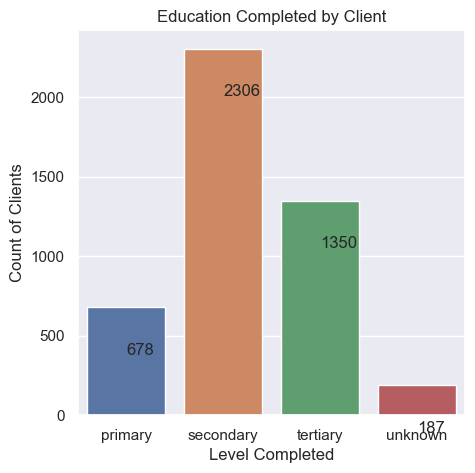

In [36]:
plt.figure(figsize=(5,5))
plt.title('Education Completed by Client')
sns.countplot(x='education', data=data,)
for i, value in enumerate(Edu_count.values):
    plt.text(i, value-300, str(value), fontsize=12)

plt.xlabel('Level Completed')
plt.ylabel('Count of Clients')
plt.show()

### Distribution of Clients with Credit Default

In [37]:
default_count = data.groupby('default')['default'].count()
default_count

default
no     4445
yes      76
Name: default, dtype: int64

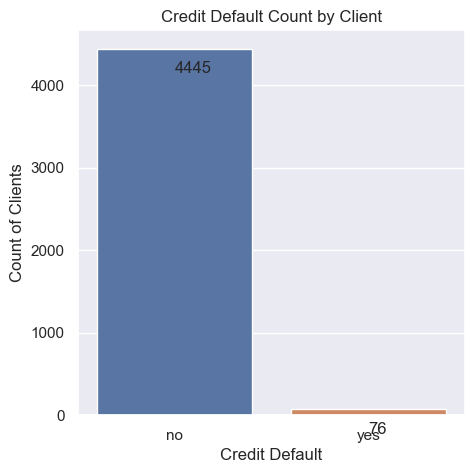

In [38]:
plt.figure(figsize=(5,5))
plt.title('Credit Default Count by Client')
sns.countplot(x='default', data=data,)
for i, value in enumerate(default_count.values):
    plt.text(i, value-300, str(value), fontsize=12)

plt.xlabel('Credit Default')
plt.ylabel('Count of Clients')
plt.show()

*The chart above shows that 98% of the clients do not have a credit deafult* 

### Age Distribution of the Clients

<AxesSubplot:ylabel='age'>

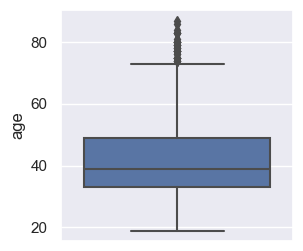

In [39]:
# Box plot to check for outliers in the age distribution

plt.figure(figsize=(3,3))
sns.boxplot(y=data['age'])

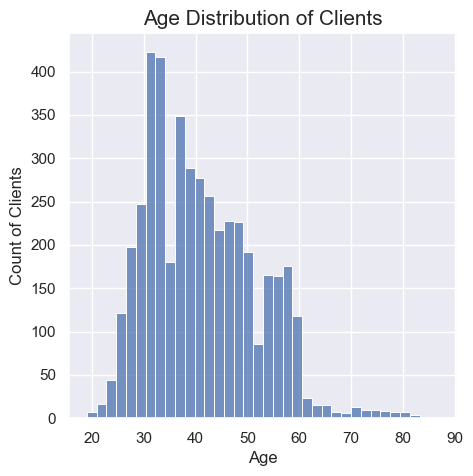

In [40]:
plt.figure(figsize=(5,5))
plt.title('Age Distribution of Clients', fontsize=15)
sns.histplot(x='age', data=data,)

plt.xlabel('Age')
plt.ylabel('Count of Clients')
plt.show()

***From the chart above, we can see that most of the clients are between the age of 32 and 35***

In [41]:
# What is the modal age?

st.mode(data['age'])

34

In [42]:
# What is the median age?

st.median(data['age'])

39

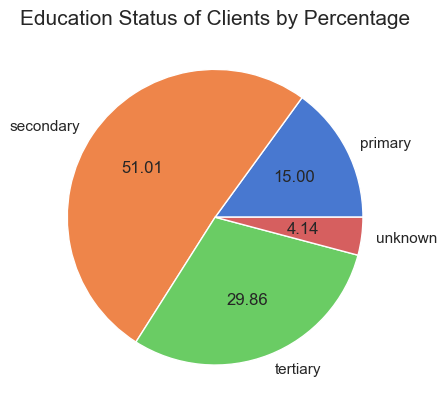

In [43]:
plt.pie(x= data.groupby('education')['education'].count(), labels= data['education'].unique(), 
        colors= sns.color_palette('muted'), autopct= '%.2f')
plt.title('Education Status of Clients by Percentage', fontsize=15)
plt.show()

***From the chart above, most of the clients are secondary education certificate holders***

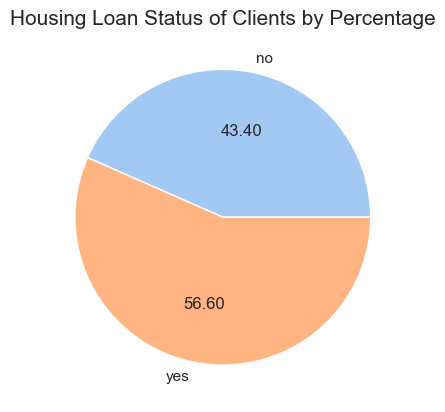

In [44]:
plt.pie(x= data.groupby('housing')['housing'].count(), labels= data['housing'].unique(), 
        colors= sns.color_palette('pastel'), autopct= '%.2f')
plt.title('Housing Loan Status of Clients by Percentage', fontsize=15)
plt.show()

***From the chart above, although close, more of the clients have housing loans***

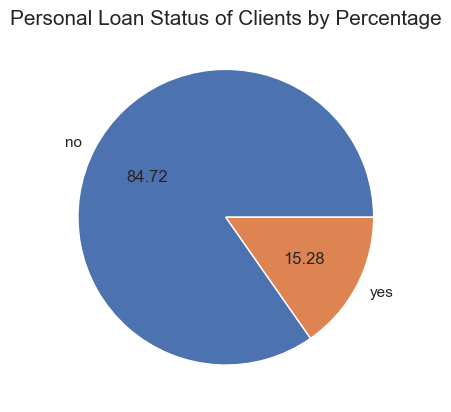

In [45]:
plt.pie(x= data.groupby('loan')['loan'].count(), labels= data['loan'].unique(), 
        colors= sns.color_palette('deep'), autopct= '%.2f')
plt.title('Personal Loan Status of Clients by Percentage', fontsize=15)
plt.show()

***From the chart above, about 84.7% of the clients do not have personal loan. Most of them are without personal debts***

## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

<AxesSubplot:>

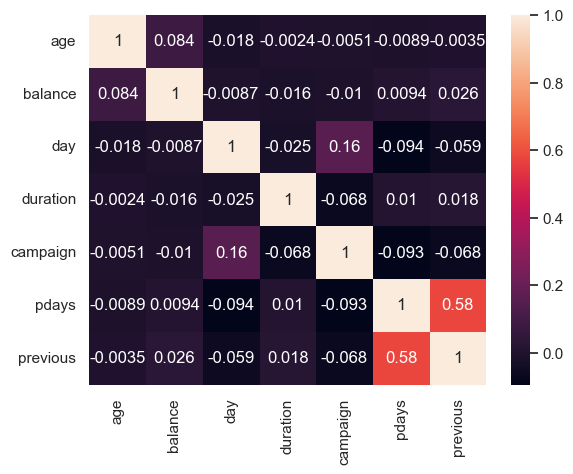

In [46]:
# Check for correlations using the heatmap

corl = data.corr()
sns.heatmap(corl, annot=True)

***This heat map is used ot show correlation between continuous or numerical data. According to the chart above, there is a slight correlation between the number of days that passed after the client was last contacted (pdays) and the number of contacts before this campaign (previous).***

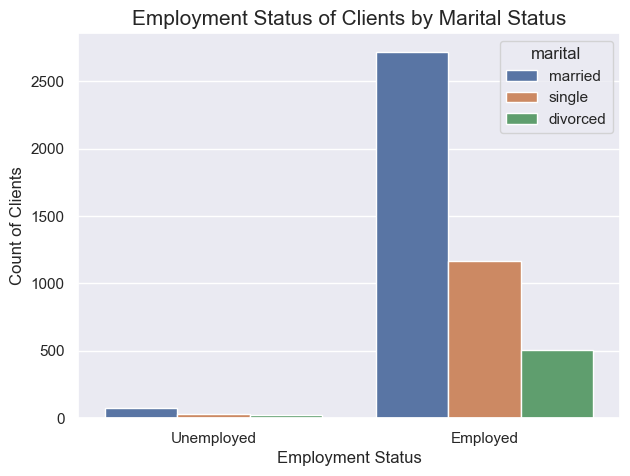

In [47]:
#Employment Status by marital status

plt.figure(figsize=(7,5))
plt.title('Employment Status of Clients by Marital Status', fontsize=15)
sns.countplot(x='Employment_status', data=data, hue='marital')
plt.xlabel('Employment Status', fontsize= 12)
plt.ylabel('Count of Clients', fontsize= 12)
plt.show()

***From the chart above, there are more married and employed clients of this bank***

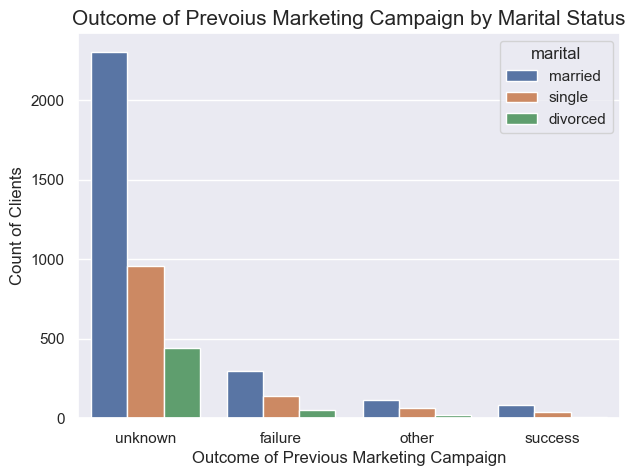

In [48]:
# Outcome of previous marketing campaign by Marital Status 

plt.figure(figsize=(7,5))
plt.title('Outcome of Prevoius Marketing Campaign by Marital Status', fontsize=15)
sns.countplot(x='poutcome', data=data, hue='marital')
plt.xlabel('Outcome of Previous Marketing Campaign', fontsize= 12)
plt.ylabel('Count of Clients', fontsize= 12)
plt.show()

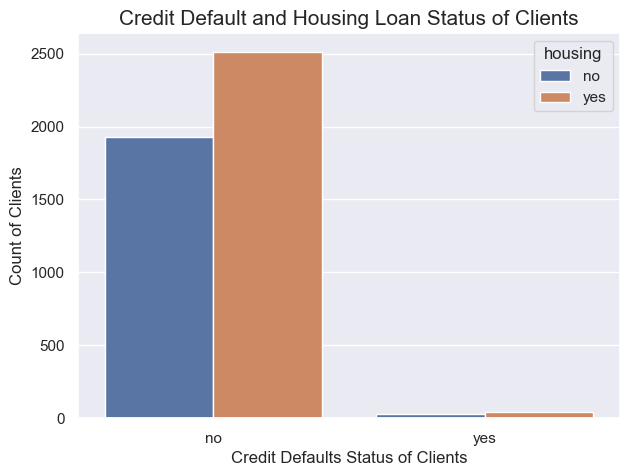

In [49]:
#Any clients with credit defaults and housing loans?

plt.figure(figsize=(7,5))
plt.title('Credit Default and Housing Loan Status of Clients', fontsize=15)
sns.countplot(x='default', data=data, hue='housing')
plt.xlabel('Credit Defaults Status of Clients', fontsize= 12)
plt.ylabel('Count of Clients', fontsize= 12)
plt.show()

***There are very few clients with credit defaults and housing***

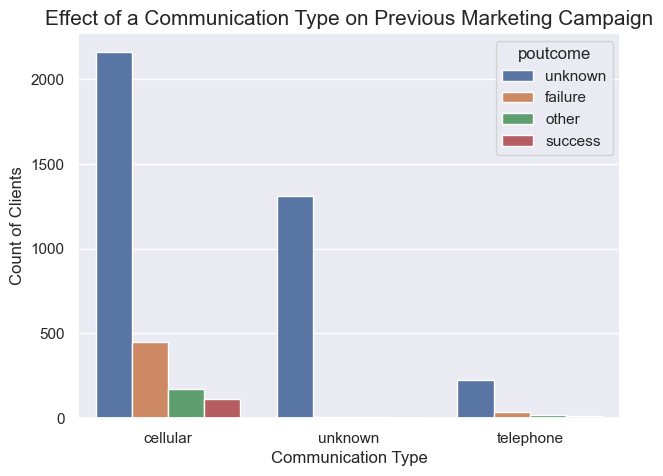

In [50]:
# How does the method of communication affect the outcome of the previous campaign?

plt.figure(figsize=(7,5))
plt.title('Effect of a Communication Type on Previous Marketing Campaign', fontsize=15)
sns.countplot(x='contact', data=data, hue='poutcome')
plt.xlabel('Communication Type', fontsize= 12)
plt.ylabel('Count of Clients', fontsize= 12)
plt.show()

***Despite contacting most of the clients via cellular, the previous marketing campaign recorded higher failure***

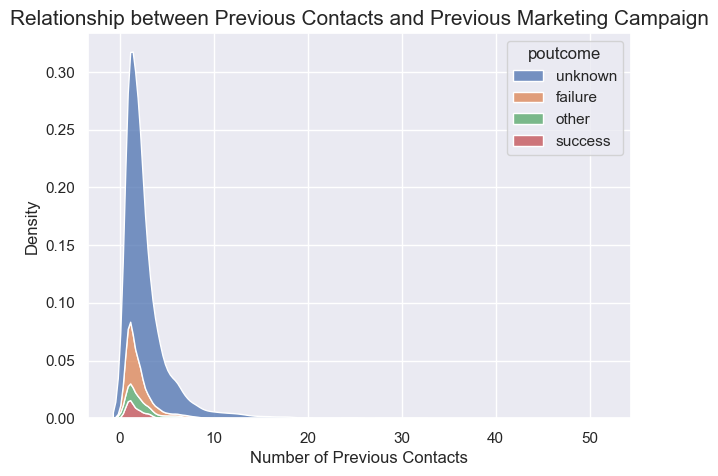

In [51]:
# Is there any relationship between the previous number of contacts and outcome of the previous marketing campaign?

plt.figure(figsize=(7,5))
plt.title('Relationship between Previous Contacts and Previous Marketing Campaign', fontsize=15)
sns.kdeplot(x='campaign', hue='poutcome', multiple='stack', fill=True, data=data)
plt.xlabel('Number of Previous Contacts', fontsize= 12)
plt.show()

***The KDE plot is like a modified histogram. It uses a probability density function unlike the histogram which uses a count of each variable. Just like the count, it estimates the number of times a variable occurs using density.***

***We can observe that the marketing campaign had a higher failure rate. This could be because the previous number of contacts made to most of the clients was between o and 3.***

***It is also worthy to note that there are many unknowns from the previous marketing campaign held by the bank***

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

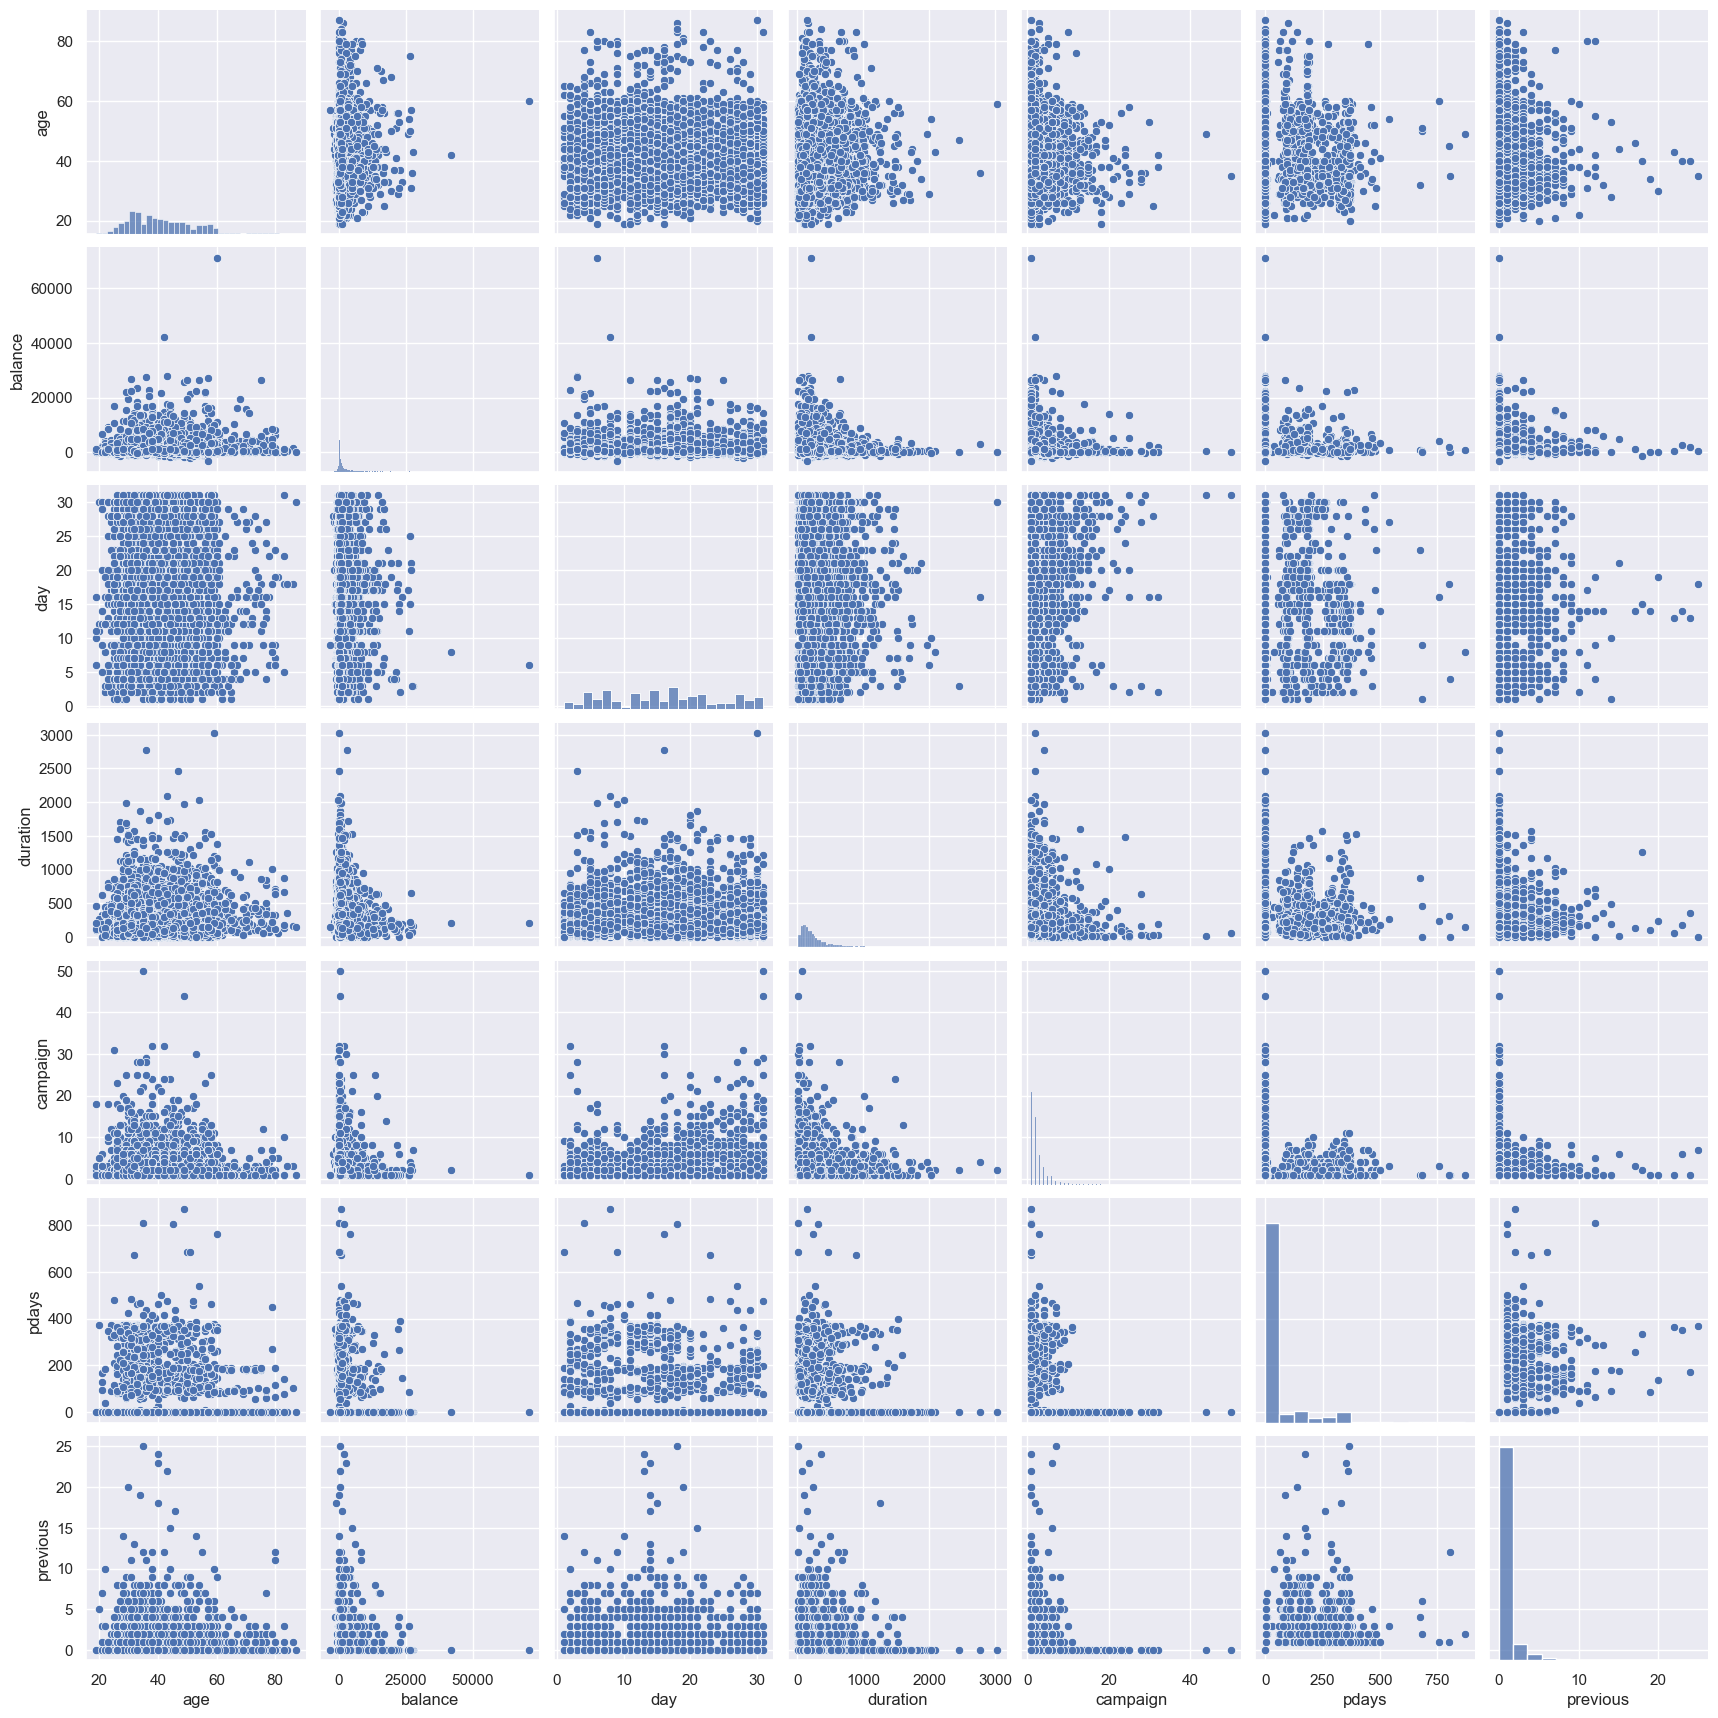

In [52]:
# Pair plot

sns.pairplot(data)

# Summary of Findings

In this markdown cell, summarize your list of findings.

1. Most of the clients are relatively well education, having completed their secondary education
2. A good number of the clients have great credit. They have shown no credit defaults over the period recorded
3. Many of the clients are married and employed
4. The previous marketing campaign had a higher record of failure among the clients

# Modelling

In this section, you will train and evaluate your models


**Before we begin to train and evaluate the models, let's try to understand the target variable. Our target variable/column is "y" which tells us if the clients has subscribed a term deposit.** 

In [53]:
# What is the distribution of values across the target column 

data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [54]:
# Let's also see the variable distribution by percentage

data.y.value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

We can therefore infere that about 88% of the clients have not subscribed a term deposit, while about 12% have subscribed

## Feature Engineering

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# Scaling Numerical Data Using Standard Scaler

numeric_variables = ['age','balance','day','duration','campaign','pdays','previous']

scaler = StandardScaler()
data[numeric_variables]  = scaler.fit_transform(data[numeric_variables])
print(data[numeric_variables])

           age   balance       day  duration  campaign     pdays  previous
1    -1.056270  0.121072  0.374052 -0.711861 -0.576829 -0.407218 -0.320413
2    -0.772583  1.118644 -0.596026 -0.169194 -0.576829  2.989044  2.041734
3    -0.583458 -0.024144  0.010273 -0.303898 -0.576829  2.899143  0.270124
4    -1.056270  0.017726 -1.566105 -0.250017  0.387967 -0.407218 -0.320413
5     1.686036 -0.472753 -1.323585 -0.146102 -0.576829 -0.407218 -0.320413
...        ...       ...       ...       ...       ...       ...       ...
4517 -0.772583 -0.583410  1.707910  0.250315  0.709566 -0.407218 -0.320413
4518  1.496912 -1.573671 -0.838546 -0.427057 -0.576829 -0.407218 -0.320413
4519  1.496912 -0.374724  0.374052 -0.434754  2.639160 -0.407218 -0.320413
4520 -1.245394 -0.094925 -1.202326 -0.519426  0.387967  1.710451  1.451197
4521  0.267602 -0.095257 -1.566105  0.311894 -0.255231  2.090033  3.813344

[4521 rows x 7 columns]


It is essential that we encode the dataset because machine learning algorithms work best with numerical rather than categorical data. 

**First we encode the target column - "y"**

We can use label encoder here because the target column does not contain more than two catgories; "yes" and "no" 

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
# Next, we initialize the encoder
le = LabelEncoder()

# After which we will fit and transform the encoder
data['y'] = le.fit_transform(data['y'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Employment_status
1,-1.056270,unemployed,married,primary,no,0.121072,no,no,cellular,0.374052,oct,-0.711861,-0.576829,-0.407218,-0.320413,unknown,0,Unemployed
2,-0.772583,services,married,secondary,no,1.118644,yes,yes,cellular,-0.596026,may,-0.169194,-0.576829,2.989044,2.041734,failure,0,Employed
3,-0.583458,management,single,tertiary,no,-0.024144,yes,no,cellular,0.010273,apr,-0.303898,-0.576829,2.899143,0.270124,failure,0,Employed
4,-1.056270,management,married,tertiary,no,0.017726,yes,yes,unknown,-1.566105,jun,-0.250017,0.387967,-0.407218,-0.320413,unknown,0,Employed
5,1.686036,blue-collar,married,secondary,no,-0.472753,yes,no,unknown,-1.323585,may,-0.146102,-0.576829,-0.407218,-0.320413,unknown,0,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,-0.772583,services,married,secondary,no,-0.583410,yes,no,cellular,1.707910,jul,0.250315,0.709566,-0.407218,-0.320413,unknown,0,Employed
4518,1.496912,self-employed,married,tertiary,yes,-1.573671,yes,yes,unknown,-0.838546,may,-0.427057,-0.576829,-0.407218,-0.320413,unknown,0,Employed
4519,1.496912,technician,married,secondary,no,-0.374724,no,no,cellular,0.374052,aug,-0.434754,2.639160,-0.407218,-0.320413,unknown,0,Employed
4520,-1.245394,blue-collar,married,secondary,no,-0.094925,no,no,cellular,-1.202326,feb,-0.519426,0.387967,1.710451,1.451197,other,0,Employed


**Next, we encode the other columns of the dataset that are categorical into numerical using one hot encoding**

In [59]:
# Create a list called 'Categorical' and pass the names of the columns having categorical data to this list
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

encoded_data = pd.get_dummies(data[categorical])
encoded_data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
# Now we merge or concatenate the encoded data to the original dataframe

data = pd.concat([data, encoded_data], axis=1)

print(data.shape)
data.head()

(4521, 62)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,-1.056270,unemployed,married,primary,no,0.121072,no,no,cellular,0.374052,...,0,0,0,0,1,0,0,0,0,1
2,-0.772583,services,married,secondary,no,1.118644,yes,yes,cellular,-0.596026,...,0,0,1,0,0,0,1,0,0,0
3,-0.583458,management,single,tertiary,no,-0.024144,yes,no,cellular,0.010273,...,0,0,0,0,0,0,1,0,0,0
4,-1.056270,management,married,tertiary,no,0.017726,yes,yes,unknown,-1.566105,...,1,0,0,0,0,0,0,0,0,1
5,1.686036,blue-collar,married,secondary,no,-0.472753,yes,no,unknown,-1.323585,...,0,0,1,0,0,0,0,0,0,1


In [61]:
# Now that we have encoded our data, we must drop the categorical data

data = data.drop(categorical, axis=1)
data

,age,balance,day,duration,campaign,pdays,previous,y,Employment_status,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,0,Unemployed,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,0,Employed,0,...,0,0,1,0,0,0,1,0,0,0
3,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,0,Employed,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,0,Employed,0,...,1,0,0,0,0,0,0,0,0,1
5,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,0,Employed,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,-0.772583,-0.583410,1.707910,0.250315,0.709566,-0.407218,-0.320413,0,Employed,0,...,0,0,0,0,0,0,0,0,0,1
4518,1.496912,-1.573671,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413,0,Employed,0,...,0,0,1,0,0,0,0,0,0,1
4519,1.496912,-0.374724,0.374052,-0.434754,2.639160,-0.407218,-0.320413,0,Employed,0,...,0,0,0,0,0,0,0,0,0,1
4520,-1.245394,-0.094925,-1.202326,-0.519426,0.387967,1.710451,1.451197,0,Employed,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
# Also, we must drop Employment_status column as it was only created for our EDA

data = data.drop(['Employment_status'], axis=1)
data

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,-0.772583,-0.583410,1.707910,0.250315,0.709566,-0.407218,-0.320413,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4518,1.496912,-1.573671,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4519,1.496912,-0.374724,0.374052,-0.434754,2.639160,-0.407218,-0.320413,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4520,-1.245394,-0.094925,-1.202326,-0.519426,0.387967,1.710451,1.451197,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [63]:
# Let's see the distribution of the target variable after encoding our data

data.y.value_counts()

0    4000
1     521
Name: y, dtype: int64

*From the distribution above,*
- 0 = "no" (client will not subscribe)
- 1 = "yes" (client will subscribe)

## Select Target

In [64]:
y = data['y']
print(y.head())

1    0
2    0
3    0
4    0
5    0
Name: y, dtype: int64


## Select Features

In [65]:
X = data.drop(['y'], axis=1)
print(X.head())

        age   balance       day  duration  campaign     pdays  previous  \
1 -1.056270  0.121072  0.374052 -0.711861 -0.576829 -0.407218 -0.320413   
2 -0.772583  1.118644 -0.596026 -0.169194 -0.576829  2.989044  2.041734   
3 -0.583458 -0.024144  0.010273 -0.303898 -0.576829  2.899143  0.270124   
4 -1.056270  0.017726 -1.566105 -0.250017  0.387967 -0.407218 -0.320413   
5  1.686036 -0.472753 -1.323585 -0.146102 -0.576829 -0.407218 -0.320413   

   job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
1           0                0                 0  ...          0          0   
2           0                0                 0  ...          0          0   
3           0                0                 0  ...          0          0   
4           0                0                 0  ...          1          0   
5           0                1                 0  ...          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
1      

## Train Test Split

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [67]:
#Split data into training and validation sets using a 40% split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4)

In [68]:
print(X_train.head())
print()
print(X_valid.head())
print()
print(y_train.head())
print()
print(y_valid.head())

           age   balance       day  duration  campaign     pdays  previous  \
208  -1.150832  0.058599 -0.959806 -0.573308 -0.576829  0.212100  0.270124   
3480 -1.529081 -0.317235 -0.110987 -0.450149 -0.576829 -0.407218 -0.320413   
1246  0.362165 -0.472753 -0.959806 -0.869658 -0.576829 -0.407218 -0.320413   
1253 -0.299771 -0.184314  0.495312  0.723705 -0.255231 -0.407218 -0.320413   
1042 -0.205209  0.491922  1.101611 -0.019095 -0.255231 -0.407218 -0.320413   

      job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  \
208            0                0                 0  ...          0   
3480           0                0                 0  ...          0   
1246           1                0                 0  ...          0   
1253           0                0                 1  ...          0   
1042           1                0                 0  ...          0   

      month_mar  month_may  month_nov  month_oct  month_sep  poutcome_failure  \
208           0        

## Import ML algorithms and initialize them

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
# Initialize all the algorithms
LR = LogisticRegression(random_state=40)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=30)
RF = RandomForestClassifier(random_state=36)

## Train and Test the models

In [71]:
def c_matrix_plot(prediction, y_valid):

    c_matrix = confusion_matrix(prediction, y_valid)
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Greens')

    ax.set_title(f'Confusion Matix for {model.__class__.__name__}');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Not Subscribe', 'Subscribe'])
    ax.yaxis.set_ticklabels(['Not Subscribe', 'Subscribe'])

    plt.show()

In [72]:
models = [LR, KN, DC, RF]

def trainer(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train) #fit the model
    prediction = model.predict(X_valid) # create predictions on the fitted model
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_valid)))
    print(classification_report(prediction, y_valid))
    print(confusion_matrix(prediction, y_valid))
    c_matrix_plot(prediction, y_valid)


For LogisticRegression, Accuracy score is 0.8999447208402432 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1706
           1       0.32      0.65      0.43       103

    accuracy                           0.90      1809
   macro avg       0.65      0.78      0.69      1809
weighted avg       0.94      0.90      0.92      1809

[[1561  145]
 [  36   67]]


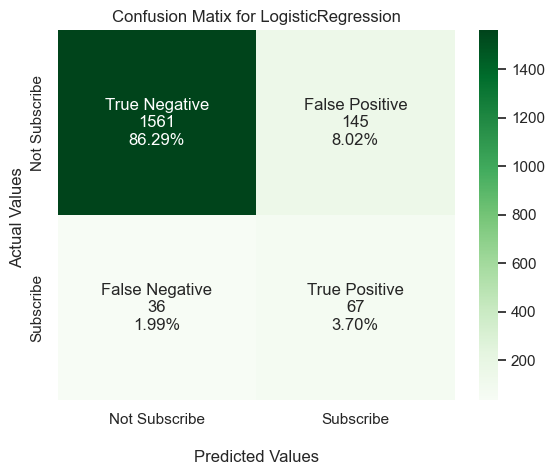


For KNeighborsClassifier, Accuracy score is 0.8877833056937534 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1720
           1       0.23      0.55      0.33        89

    accuracy                           0.89      1809
   macro avg       0.60      0.73      0.63      1809
weighted avg       0.94      0.89      0.91      1809

[[1557  163]
 [  40   49]]


/Users/boluwatifeoduyemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


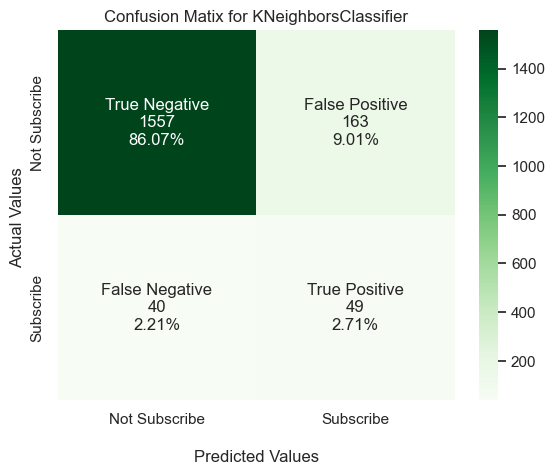


For DecisionTreeClassifier, Accuracy score is 0.8684355997788834 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1601
           1       0.43      0.44      0.43       208

    accuracy                           0.87      1809
   macro avg       0.68      0.68      0.68      1809
weighted avg       0.87      0.87      0.87      1809

[[1480  121]
 [ 117   91]]


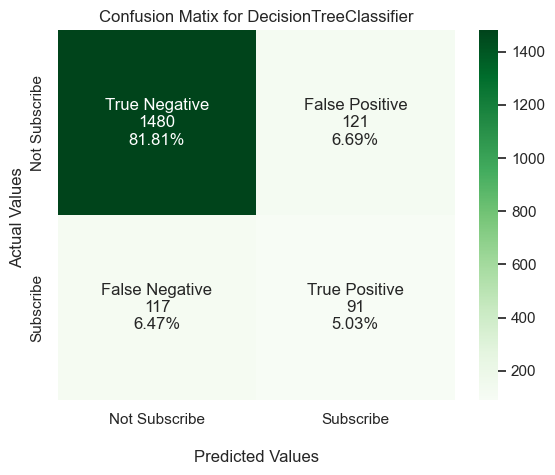


For RandomForestClassifier, Accuracy score is 0.8982863460475401 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1717
           1       0.28      0.65      0.39        92

    accuracy                           0.90      1809
   macro avg       0.63      0.78      0.67      1809
weighted avg       0.94      0.90      0.92      1809

[[1565  152]
 [  32   60]]


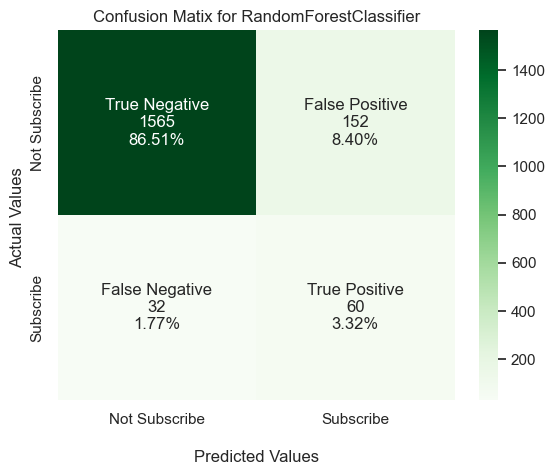

In [73]:
# loop through each model, training in the process
for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

- *Observing the classification reports of our models, we can see that there were more predictions made for the majority class, which is the class of those that will not subscribe for the product. This is because there were more of this class in our dataset.*

- *We can also see that the Logistic Regression model gives the best accuracy and recall when predicting clients that will not subscribe for the product. It also gives the best f1-score for the same prediction.* 

- *The Logistic Regression model also appears to be to best model to predict that customers will subscribe for the product. It gives a high accuracy of about 90% and also gives a high recall score of 65%; stating that the proportion of True Positives correctly identified by the Logistic Regression model is higher than all other models.*

- *Evaluating the overall performance of the models by inspecting the macro average, we can clearly deduce that the Logistic Regression model performs best as it gives the highest recall score of 78%. Although the RandomForest model also gives the same recall score, by inspecting the f1-score, we see that the Logistic Regression model does best* 

## Summary

What model should be deployed to production?
Any other comments?

*The Logistic Regression model should be deployed*